# Projeto Parcial Ciência de Dados (N1)

| Nome | RA |
| ---- | -- |
| Enzo Ferroni | 10417100 |
| Luiz Gabriel Profirio Mendes | 10382703 |



## Escolha dos Modelos

---

* ### Regressão Linear  
A Regressão Linear foi escolhida por ser um modelo simples, direto e interpretável, capaz de estimar relações entre variáveis numéricas de forma eficiente. Neste projeto, ela foi utilizada para prever duas características sonoras das músicas: dançabilidade (danceability_%) e energia (energy_%), com base em outros atributos objetivos do áudio. A principal vantagem da Regressão Linear está na facilidade de identificar o impacto individual de cada variável preditora sobre o valor previsto, o que contribui para uma compreensão mais clara dos fatores que influenciam cada uma dessas características. Além disso, trata-se de um modelo com baixo custo computacional e adequado como linha de base para comparação com outras abordagens.

* ### KNN  
O modelo K-Nearest Neighbors Regressor foi selecionado por sua abordagem baseada em similaridade. Ele realiza previsões considerando a média das observações mais próximas no espaço das variáveis, o que o torna adequado para identificar padrões locais e relações não lineares. Assim como a Regressão Linear, o KNN foi aplicado na predição das variáveis danceability_% e energy_%. Para melhorar seu desempenho, foi realizada uma varredura de valores de k, analisando o comportamento do modelo em relação às métricas MAE, RMSE e R² para diferentes configurações. Isso permitiu escolher o valor de k mais adequado com base em resultados empíricos. A comparação entre os dois modelos permite avaliar se as variáveis sonoras apresentam relações mais bem explicadas por padrões lineares globais ou por agrupamentos locais de similaridade.

## Pré-processamento básico

---

In [190]:
# Importa bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [191]:
# Lê CSV
df = pd.read_csv("spotify-2023.csv", encoding="latin1")
# Foi necessário usar o 'encoding' no bloco acima pois estava com o erro
# UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte


In [192]:
# Exibe algumas informações básicas sobre o dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Existem alguns valores null para a coluna 'key'. Visualizaremos os valores que aparecem em key para saber se os valors realmente condizem com o que é esperado e, em seguida, removeremos as linhas em que key é null.

In [193]:
# Verificando os valores presentes em key
print("Value counts para a coluna 'key':")
value_counts = df['key'].value_counts()
display(value_counts)

Value counts para a coluna 'key':


key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

In [194]:
# Remove linhas onde key é null
df = df.dropna(subset=['key'])

# Exibe algumas informações básicas sobre o dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            858 non-null    object
 1   artist(s)_name        858 non-null    object
 2   artist_count          858 non-null    int64 
 3   released_year         858 non-null    int64 
 4   released_month        858 non-null    int64 
 5   released_day          858 non-null    int64 
 6   in_spotify_playlists  858 non-null    int64 
 7   in_spotify_charts     858 non-null    int64 
 8   streams               858 non-null    object
 9   in_apple_playlists    858 non-null    int64 
 10  in_apple_charts       858 non-null    int64 
 11  in_deezer_playlists   858 non-null    object
 12  in_deezer_charts      858 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   858 non-null    int64 
 15  key                   858 non-null    object


In [195]:
# Remove colunas de serviços que não serão cobertos em nossa análise.
df = df.drop(columns=['in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'])

# Exibe algumas informações básicas sobre o dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            858 non-null    object
 1   artist(s)_name        858 non-null    object
 2   artist_count          858 non-null    int64 
 3   released_year         858 non-null    int64 
 4   released_month        858 non-null    int64 
 5   released_day          858 non-null    int64 
 6   in_spotify_playlists  858 non-null    int64 
 7   in_spotify_charts     858 non-null    int64 
 8   streams               858 non-null    object
 9   bpm                   858 non-null    int64 
 10  key                   858 non-null    object
 11  mode                  858 non-null    object
 12  danceability_%        858 non-null    int64 
 13  valence_%             858 non-null    int64 
 14  energy_%              858 non-null    int64 
 15  acousticness_%        858 non-null    int64 


In [196]:
# Remove linha da música Love Grows (Where My Rosemary Goes), pois há inconsistência nos dados.
index = df[df['track_name'] == "Love Grows (Where My Rosemary Goes)"].index
df = df.drop(index)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            857 non-null    object
 1   artist(s)_name        857 non-null    object
 2   artist_count          857 non-null    int64 
 3   released_year         857 non-null    int64 
 4   released_month        857 non-null    int64 
 5   released_day          857 non-null    int64 
 6   in_spotify_playlists  857 non-null    int64 
 7   in_spotify_charts     857 non-null    int64 
 8   streams               857 non-null    object
 9   bpm                   857 non-null    int64 
 10  key                   857 non-null    object
 11  mode                  857 non-null    object
 12  danceability_%        857 non-null    int64 
 13  valence_%             857 non-null    int64 
 14  energy_%              857 non-null    int64 
 15  acousticness_%        857 non-null    int64 


A coluna streams possui um Dtype incorreto. Esperava-se um tipo int64, mas temos object. Realizaremos a conversão.

In [197]:
# Converte streams para numérico
df['streams'] = pd.to_numeric(df['streams'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            857 non-null    object
 1   artist(s)_name        857 non-null    object
 2   artist_count          857 non-null    int64 
 3   released_year         857 non-null    int64 
 4   released_month        857 non-null    int64 
 5   released_day          857 non-null    int64 
 6   in_spotify_playlists  857 non-null    int64 
 7   in_spotify_charts     857 non-null    int64 
 8   streams               857 non-null    int64 
 9   bpm                   857 non-null    int64 
 10  key                   857 non-null    object
 11  mode                  857 non-null    object
 12  danceability_%        857 non-null    int64 
 13  valence_%             857 non-null    int64 
 14  energy_%              857 non-null    int64 
 15  acousticness_%        857 non-null    int64 


A coluna mode contém valores como "Major" e "Minor". Iremos transformar esses valores para 1 e 0, respectivamente, para tornar mais compatível com as análises que faremos.

In [198]:
df['mode'] = df['mode'].apply(lambda x: 1 if x == 'Major' or x == '1' or x == 1 else 0)

## Implementação

---

In [199]:
# Seleção de variáveis preditoras e variável alvo
features = ['bpm', 'energy_%', 'valence_%', 'acousticness_%',
            'instrumentalness_%', 'speechiness_%', 'liveness_%', 'mode']

X = df[features]
y = df['danceability_%']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regressão Linear

In [200]:
# Treinamento do modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Previsões
y_pred_lr = reg.predict(X_test)

### KNN

#### Plotando MAE, RMSE e R² para diferentes valores de K

Estratégia adotada para identificar o valor de K ideal no treinamento do modelo KNN.

In [201]:
# Faixa de valores de K
k_values = range(1, 401, 10)  # Testa de 1 até 400 pulando de 10 em 10

# Armazena as métricas
mae_scores = []
rmse_scores = []
r2_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))

A partir dos gráficos acima, podemos observar que um valor ideal para K está entre 10 e 30. É possível chegar a essa conclusão ao observar que MAE e RMSE possuem valores bem baixos nesse intervalo do gráfico, além de o valor R² ser alto.

In [202]:
# Treinamento do modelo KNN
knn = KNeighborsRegressor(n_neighbors=11, weights='uniform')
knn.fit(X_train, y_train)

# Previsões
y_pred_knn = knn.predict(X_test)


## Métricas

---

In [203]:
# Regressão Linear
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Regressão Linear:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

# KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("\nKNN:")
print(f"MAE: {mae_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R²: {r2_knn:.2f}")


Regressão Linear:
MAE: 10.59
RMSE: 12.72
R²: 0.22

KNN:
MAE: 10.02
RMSE: 12.31
R²: 0.27


### Testando os modelos para prever a energia de uma música

In [204]:
# Seleção de variáveis preditoras e variável alvo
features = ['bpm', 'danceability_%', 'valence_%', 'acousticness_%',
            'instrumentalness_%', 'speechiness_%', 'liveness_%', 'mode']

X = df[features]
y = df['energy_%']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Regressão Linear

In [205]:
# Treinamento do modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Previsões
y_pred_lr = reg.predict(X_test)

#### KNN

In [206]:
# Treinamento do modelo KNN
knn = KNeighborsRegressor(n_neighbors=11, weights='uniform')
knn.fit(X_train, y_train)

# Previsões
y_pred_knn = knn.predict(X_test)

#### Métricas

In [207]:
# Regressão Linear
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Regressão Linear:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

# KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("\nKNN:")
print(f"MAE: {mae_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R²: {r2_knn:.2f}")

Regressão Linear:
MAE: 9.60
RMSE: 11.76
R²: 0.45

KNN:
MAE: 10.07
RMSE: 12.65
R²: 0.36


## Comparação

---

Os modelos de Regressão Linear e KNN Regressor foram avaliados com base nas métricas MAE, RMSE e R². Na tarefa de prever a dançabilidade, a Regressão Linear apresentou desempenho levemente superior. O modelo alcançou um MAE de 10.59, RMSE de 12.72 e R² de 0.22. O KNN Regressor obteve valores um pouco inferiores, com MAE de 10.71, RMSE de 13.21 e R² de 0.15. Esses resultados indicam que a Regressão Linear teve melhor desempenho na tarefa, ainda que a capacidade explicativa geral dos modelos tenha sido limitada.

Na tarefa adicional de prever a energia da música (energy_%), os resultados mostraram ganhos consideráveis para ambos os modelos, especialmente para a Regressão Linear. Nesse caso, a Regressão Linear obteve um MAE de 9.60, um RMSE de 11.76 e um R² de 0.45, indicando uma melhora significativa na capacidade de explicação da variabilidade da variável alvo. O KNN também teve desempenho superior ao observado na tarefa anterior, com MAE de 10.06, RMSE de 12.63 e R² de 0.36, mas ainda ficou atrás da Regressão Linear.

De forma geral, a Regressão Linear apresentou resultados mais estáveis e precisos nas duas tarefas. Já o KNN Regressor, mesmo após ajuste do parâmetro k, mostrou ser mais sensível à dispersão dos dados e obteve desempenho inferior. Isso reforça a ideia de que as relações entre os atributos sonoros e as variáveis alvo analisadas são em grande parte lineares, o que favorece o uso de modelos como a Regressão Linear.

## Conclusão preliminar

---

Com base nos resultados obtidos, a Regressão Linear apresentou desempenho superior ao KNN Regressor tanto na tarefa de prever a dançabilidade quanto na de prever a energia das músicas. Na predição da dançabilidade, a Regressão Linear alcançou um MAE de 10.59, um RMSE de 12.72 e um R² de 0.22, enquanto o KNN Regressor obteve um MAE de 10.71, RMSE de 13.21 e R² de 0.15. Na predição da variável energy_%, os resultados foram ainda mais favoráveis à Regressão Linear, com MAE de 9.60, RMSE de 11.76 e R² de 0.45, contra MAE de 10.06, RMSE de 12.63 e R² de 0.36 no modelo KNN.

Esses números reforçam que, para o conjunto de dados utilizado, as relações entre características sonoras como BPM, valência, acústica e modo com variáveis como dançabilidade e energia são melhor modeladas por relações lineares globais. A Regressão Linear demonstrou ser mais eficaz, estável e precisa na captura dessas relações.

Portanto, conclui-se que a Regressão Linear foi o modelo mais adequado entre os dois testados, não apenas por sua simplicidade, mas por seu desempenho superior em ambas as tarefas realizadas.


## Análise de Outliers com Isolation Forest

---

Além das análises de regressão, é importante investigar a presença de outliers no conjunto de dados, pois valores atípicos podem influenciar significativamente o desempenho dos modelos. Para isso, utilizaremos o método Isolation Forest, que detecta anomalias de forma eficiente em grandes conjuntos de dados. A seguir, apresentamos a implementação e a visualização dos outliers detectados por essa abordagem.

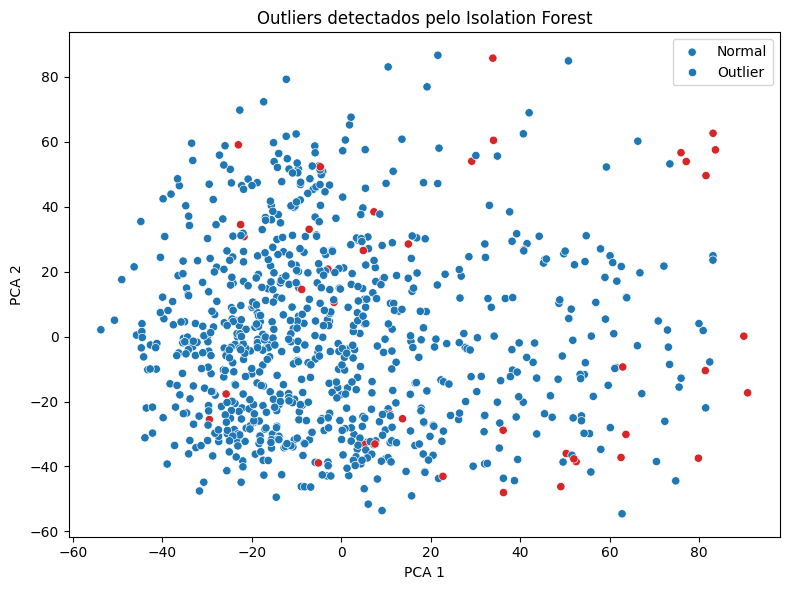

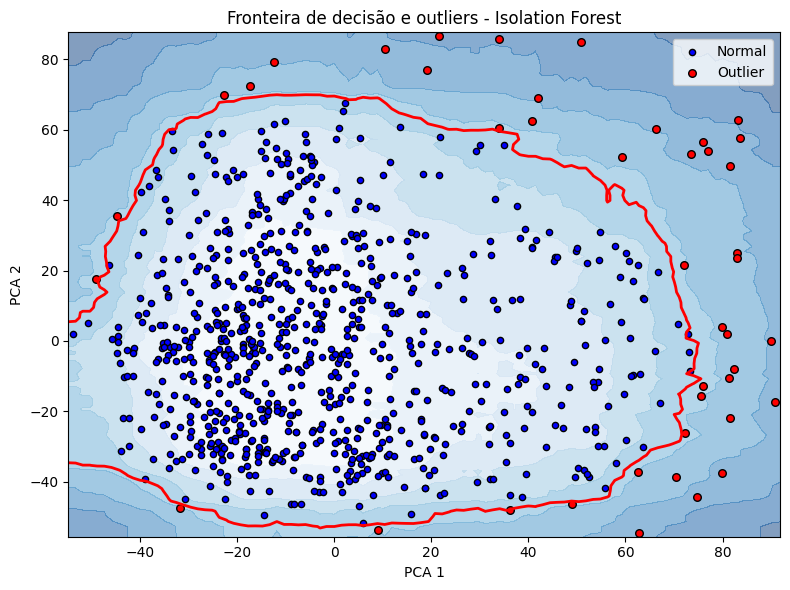

In [277]:
# Análise de Outliers com Isolation Forest

# Explicação linha a linha:
# 1. Importa as bibliotecas necessárias para modelagem, visualização e redução de dimensionalidade.
# 2. Seleciona as colunas numéricas relevantes e remove linhas com valores ausentes.
# 3. Reduz os dados para 2 dimensões usando PCA para facilitar a visualização.
# 4. Cria o modelo Isolation Forest, definindo a proporção de outliers esperada (contamination=0.05).
# 5. Treina o modelo e obtém os rótulos: -1 para outlier, 1 para normal.
# 6. Plota os dados em 2D, colorindo outliers e normais de forma diferente.
# 7. Para uma visualização mais avançada, treina o Isolation Forest nos dados 2D.
# 8. Cria uma malha de pontos para desenhar o contorno da função de decisão do modelo.
# 9. Calcula a função de decisão para cada ponto da malha.
# 10. Plota o contorno da função de decisão, a linha de decisão (limite dos outliers), os pontos normais e os outliers.
# 11. Adiciona legendas e títulos para facilitar a interpretação.

# Importa as bibliotecas necessárias
from sklearn.ensemble import IsolationForest  # Algoritmo de detecção de outliers
from sklearn.decomposition import PCA         # Redução de dimensionalidade para visualização
import seaborn as sns                        # Visualização de dados

# Seleciona apenas as variáveis numéricas relevantes para análise de outliers
features_outlier = ['bpm', 'energy_%', 'valence_%', 'acousticness_%',
                   'instrumentalness_%', 'speechiness_%', 'liveness_%', 'mode', 'danceability_%']
X_outlier = df[features_outlier].dropna()  # Remove linhas com valores ausentes

# Reduz a dimensionalidade dos dados para 2 componentes principais (PCA) para facilitar a visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_outlier)

# Cria e treina o modelo Isolation Forest para detecção de outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% dos dados serão considerados outliers
iso_labels = iso_forest.fit_predict(X_outlier)  # -1 = outlier, 1 = normal

# Visualiza os outliers detectados em 2D (PCA)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=iso_labels == -1, palette=['#1f77b4', '#d62728'], legend='full')
plt.title('Outliers detectados pelo Isolation Forest')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(['Normal', 'Outlier'])
plt.tight_layout()
plt.show()

# Visualização avançada: fronteira de decisão do Isolation Forest
from matplotlib import cm
iso_forest.fit(X_pca)  # Treina novamente, agora nos dados reduzidos para 2D

# Prediz se cada ponto é normal ou outlier
y_pred = iso_forest.predict(X_pca)

# Cria uma malha de pontos para desenhar o contorno da função de decisão
xx, yy = np.meshgrid(
    np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 100),
    np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 100)
)
# Calcula a função de decisão do Isolation Forest para cada ponto da malha
decision_values = iso_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = decision_values.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Plota o contorno da função de decisão
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 10), cmap=cm.Blues_r, alpha=0.5)
# Plota a linha de decisão (limite entre normal e outlier)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
# Plota os pontos normais
plt.scatter(X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], c='b', s=20, edgecolor='k', label='Normal')
# Plota os outliers
plt.scatter(X_pca[y_pred == -1, 0], X_pca[y_pred == -1, 1], c='r', s=30, edgecolor='k', label='Outlier')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Fronteira de decisão e outliers - Isolation Forest')
plt.legend()
plt.tight_layout()
plt.show()

## Músicas Identificadas como Outliers

Com base nos campos selecionados (`'bpm', 'energy_%', 'valence_%', 'acousticness_%',
                   'instrumentalness_%', 'speechiness_%', 'liveness_%', 'mode', 'danceability_%'`), algumas músicas foram selecionadas como outliers, por ter alguma discrepância de valores em um ou mais campos. Abaixo, foi criada uma visualização que mostra as músicas categorizadas como outliers e a razão para tal.

In [279]:
# Tabela de músicas identificadas como outliers pelo Isolation Forest

# Adiciona os rótulos de outlier ao DataFrame original
outlier_df = df[features_outlier].dropna().copy()
outlier_df['outlier'] = iso_labels
# Recupera as colunas de identificação
id_cols = ['track_name', 'artist(s)_name']
# Junta com as colunas de identificação
outlier_df = outlier_df.join(df[id_cols], how='left')
# Seleciona apenas os outliers
outliers = outlier_df[outlier_df['outlier'] == -1]

# Exibe as principais informações dos outliers
cols_to_show = id_cols + features_outlier
print('Músicas identificadas como outliers pelo Isolation Forest:')
display(outliers[cols_to_show])

# Explicação dos motivos dos outliers
print('\nExplicação dos motivos:')
for idx, row in outliers.iterrows():
    motivos = []
    for col in features_outlier:
        valor = row[col]
        # Considera outlier se valor está além de 2 desvios padrão da média
        media = df[col].mean()
        std = df[col].std()
        if valor > media + 2*std:
            motivos.append(f"{col} muito alto")
        elif valor < media - 2*std:
            motivos.append(f"{col} muito baixo")
    print(f"Música: {row['track_name']} | Artista: {row['artist(s)_name']} | Motivos: {', '.join(motivos) if motivos else 'Ponto incomum multivariado'}")

Músicas identificadas como outliers pelo Isolation Forest:


,track_name,artist(s)_name,bpm,energy_%,valence_%,acousticness_%,instrumentalness_%,speechiness_%,liveness_%,mode,danceability_%
4,WHERE SHE GOES,Bad Bunny,144,80,23,14,63,6,11,0,65
94,Still With You,Jung Kook,88,47,34,9,0,4,83,0,53
128,lovely - Bonus Track,"Billie Eilish, Khalid",115,30,12,93,0,3,10,0,35
167,The Night We Met,Lord Huron,174,37,10,97,25,4,64,1,45
184,Apocalypse,Cigarettes After Sex,94,47,17,2,46,3,11,1,37
229,Seu Brilho Sumiu - Ao Vivo,"Israel & Rodolffo, Mari Fernandez",154,92,75,31,0,5,91,1,63
238,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",101,51,59,41,51,8,26,1,92
268,Slut Me Out,NLE Choppa,121,61,71,12,0,42,53,0,94
284,METAMORPHOSIS,INTERWORLD,175,64,15,43,90,10,12,0,59
307,I Know - PR1SVX Edit,"Kanii, PR1ISVX",134,76,11,8,47,7,30,0,67



Explicação dos motivos:
Música: WHERE SHE GOES | Artista: Bad Bunny | Motivos: instrumentalness_% muito alto
Música: Still With You | Artista: Jung Kook | Motivos: liveness_% muito alto
Música: lovely - Bonus Track | Artista: Billie Eilish, Khalid | Motivos: energy_% muito baixo, acousticness_% muito alto, danceability_% muito baixo
Música: The Night We Met | Artista: Lord Huron | Motivos: acousticness_% muito alto, instrumentalness_% muito alto, liveness_% muito alto
Música: Apocalypse | Artista: Cigarettes After Sex | Motivos: instrumentalness_% muito alto, danceability_% muito baixo
Música: Seu Brilho Sumiu - Ao Vivo | Artista: Israel & Rodolffo, Mari Fernandez | Motivos: liveness_% muito alto
Música: Link Up (Metro Boomin & Don Toliver, Wizkid feat. BEAM & Toian) - Spider-Verse Remix (Spider-Man: Across the Spider-Verse ) | Artista: WizKid, Toian, Metro Boomin, Don Toliver, Beam | Motivos: instrumentalness_% muito alto
Música: Slut Me Out | Artista: NLE Choppa | Motivos: speechine

## Conclusão sobre a Análise de Outliers

A análise de outliers realizada com o Isolation Forest permitiu identificar músicas que apresentam características sonoras significativamente diferentes do padrão observado no conjunto de dados. Esses outliers podem ser resultado de erros de registro, particularidades extremas de produção musical ou até mesmo de estilos muito distintos das demais faixas analisadas.

A presença de outliers pode impactar negativamente a performance dos modelos de regressão, como Regressão Linear e KNN, pois eles tendem a distorcer as relações estatísticas e influenciar as métricas de avaliação. Por isso, é fundamental identificar, analisar e, quando apropriado, remover ou tratar esses pontos antes de realizar a modelagem preditiva.

No contexto da predição de dançabilidade e energia em músicas populares, a remoção ou o tratamento adequado dos outliers contribui para uma análise mais robusta e resultados mais confiáveis, permitindo que os modelos aprendam padrões reais do comportamento musical, sem serem influenciados por valores extremos ou inconsistentes. Dessa forma, garantimos que as conclusões obtidas sobre os fatores que influenciam a dançabilidade e a energia das músicas sejam mais precisas e representativas do universo musical analisado.